<a href="https://colab.research.google.com/github/Jhon4t4nEmbus/Talento_Tech/blob/main/Min%20proyecto%20final/EDA_MINIPROYC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA

## Importación librerías

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

## Cargar los datos

In [7]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vScnmcowCkZC4Slqz9ZlCxefQNi-6b77uKSIrK51ssvAiNLhfH4zbgb39_RDpO73TvyAOn1hi-XvzNy/pub?gid=941099605&single=true&output=csv')
df

Mounted at /content/drive


,ENTIDAD,VIGENCIA,CÓDIGO CONTRATO,VALOR INICIAL CONTRATO,ADICIONES,LIBERACIONE,VALOR VIGENTE,FECHA SUCRIPCION,FECHA ACTA DE INICIO,FECHA TERMINACION,TIEMPO EJECUCIÓN,MODALIDAD CONTRATACIÓN,CAUAL CONTRATO,TIPO CONTRATO,FECHA CREACIÓN,FECHA TERMINACION AMPLIADA,NOMBRE,TIPO,ETADO CONTRATO
0,MUNICIPIO DE PAEZ,2019.0,180-2019,1.441315e+09,134275963.0,0.0,1.575591e+09,25/06/2019,01/08/2019,01/04/2020,302.0,LICITACIONE PÚBLICA,LICITACIÓN PÚBLICA,Contrato de Obra,01/08/2019,15/09/2022,UNION TEMPORAL CUBIERTA 2019,Unión Temporal,Rendido
1,MUNICIPIO DE PAEZ,NaN,272-2019,3.453235e+08,50283488.0,0.0,3.956070e+08,18/09/2019,26/09/2019,26/01/2020,180.0,LICITACIONE PÚBLICA,LICITACIÓN PÚBLICA,Contrato de Obra,26/09/2019,30/03/2022,DIEGO ARMANDO LOPEZ GONZALEZ,contratista,Rendido
2,MUNICIPIO DE PAEZ,2019.0,253-2019,7.199219e+08,277731255.0,0.0,9.976531e+08,23/08/2019,27/09/2019,27/02/2020,390.0,LICITACIONE PÚBLICA,LICITACIÓN PÚBLICA,Contrato de Obra,27/09/2019,8/10/2021,consorcio POLIDEPORTIVO PAEZ,consorcio,Rendido
3,MUNICIPIO DE PAEZ,2019.0,291-2019,5.959969e+08,156000000.0,775.0,7.519962e+08,15/10/2019,29/10/2019,29/01/2020,180.0,LICITACIONE PÚBLICA,LICITACIÓN PÚBLICA,Contrato de Obra,31/10/2019,29/08/2022,NELON HERNANDO PANTOJA TRUJILLO,contratista,Rendido
4,MUNICIPIO DE PAEZ,NaN,355-2019,3.770614e+08,30000000.0,0.0,4.070614e+08,3/12/2019,17/12/2019,17/05/2020,301.0,LICITACIONE PÚBLICA,LICITACIÓN PÚBLICA,Contrato de Obra,17/12/2019,12/02/2021,ALBEIRO PLAZA Y AOCIADO .A.,ociedad con Objeto Único,Rendido
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1715,MUNICIPIO DE PAEZ,2023.0,248-2023,1.503659e+07,0.0,0.0,1.503659e+07,22/12/2023,23/12/2023,27/12/2023,4.0,MÍNIMA CUANTÍA,Mínima Cuantía,Contrato de Obra,09/01/2024,27/12/2023,JUAN DIEGO POLANCO,contratista,Rendido
1716,MUNICIPIO DE PAEZ,2023.0,244-2023,3.239168e+07,0.0,0.0,3.239168e+07,22/12/2023,22/12/2023,31/12/2023,9.0,MÍNIMA CUANTÍA,Mínima Cuantía,Contrato de Obra,08/01/2024,31/12/2023,EDGAR AUGUTO ARRIA BECA,contratista,Rendido
1717,MUNICIPIO DE PAEZ,2023.0,245-2023,2.271176e+07,0.0,444041.0,2.226772e+07,22/12/2023,22/12/2023,31/12/2023,9.0,MÍNIMA CUANTÍA,Mínima Cuantía,Contrato de Obra,08/01/2024,NaN,EDGAR AUGUTO ARRIA BECA,contratista,Rendido
1718,MUNICIPIO DE PAEZ,2023.0,246-2023,3.236442e+07,0.0,0.0,3.236442e+07,22/12/2023,22/12/2023,31/12/2023,9.0,MÍNIMA CUANTÍA,Mínima Cuantía,Contrato de Obra,10/01/2024,NaN,EDGAR AUGUTO ARRIA BECA,contratista,Rendido


In [8]:
df.head(5)

,ENTIDAD,VIGENCIA,CÓDIGO CONTRATO,VALOR INICIAL CONTRATO,ADICIONES,LIBERACIONE,VALOR VIGENTE,FECHA SUCRIPCION,FECHA ACTA DE INICIO,FECHA TERMINACION,TIEMPO EJECUCIÓN,MODALIDAD CONTRATACIÓN,CAUAL CONTRATO,TIPO CONTRATO,FECHA CREACIÓN,FECHA TERMINACION AMPLIADA,NOMBRE,TIPO,ETADO CONTRATO
0,MUNICIPIO DE PAEZ,2019.0,180-2019,1.441315e+09,134275963.0,0.0,1.575591e+09,25/06/2019,01/08/2019,01/04/2020,302.0,LICITACIONE PÚBLICA,LICITACIÓN PÚBLICA,Contrato de Obra,01/08/2019,15/09/2022,UNION TEMPORAL CUBIERTA 2019,Unión Temporal,Rendido
1,MUNICIPIO DE PAEZ,NaN,272-2019,3.453235e+08,50283488.0,0.0,3.956070e+08,18/09/2019,26/09/2019,26/01/2020,180.0,LICITACIONE PÚBLICA,LICITACIÓN PÚBLICA,Contrato de Obra,26/09/2019,30/03/2022,DIEGO ARMANDO LOPEZ GONZALEZ,contratista,Rendido
2,MUNICIPIO DE PAEZ,2019.0,253-2019,7.199219e+08,277731255.0,0.0,9.976531e+08,23/08/2019,27/09/2019,27/02/2020,390.0,LICITACIONE PÚBLICA,LICITACIÓN PÚBLICA,Contrato de Obra,27/09/2019,8/10/2021,consorcio POLIDEPORTIVO PAEZ,consorcio,Rendido
3,MUNICIPIO DE PAEZ,2019.0,291-2019,5.959969e+08,156000000.0,775.0,7.519962e+08,15/10/2019,29/10/2019,29/01/2020,180.0,LICITACIONE PÚBLICA,LICITACIÓN PÚBLICA,Contrato de Obra,31/10/2019,29/08/2022,NELON HERNANDO PANTOJA TRUJILLO,contratista,Rendido
4,MUNICIPIO DE PAEZ,NaN,355-2019,3.770614e+08,30000000.0,0.0,4.070614e+08,3/12/2019,17/12/2019,17/05/2020,301.0,LICITACIONE PÚBLICA,LICITACIÓN PÚBLICA,Contrato de Obra,17/12/2019,12/02/2021,ALBEIRO PLAZA Y AOCIADO .A.,ociedad con Objeto Único,Rendido


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1720 entries, 0 to 1719
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ENTIDAD                     1720 non-null   object 
 1   VIGENCIA                    1698 non-null   float64
 2   CÓDIGO CONTRATO             1706 non-null   object 
 3   VALOR INICIAL CONTRATO      1706 non-null   float64
 4   ADICIONES                   1706 non-null   float64
 5   LIBERACIONE                 1706 non-null   float64
 6   VALOR VIGENTE               1706 non-null   float64
 7   FECHA SUCRIPCION            1706 non-null   object 
 8   FECHA ACTA DE INICIO        1706 non-null   object 
 9   FECHA TERMINACION           1706 non-null   object 
 10  TIEMPO EJECUCIÓN            1706 non-null   float64
 11  MODALIDAD CONTRATACIÓN      1706 non-null   object 
 12  CAUAL CONTRATO              1706 non-null   object 
 13  TIPO CONTRATO               1706 

In [10]:
df.describe(include='all')

,ENTIDAD,VIGENCIA,CÓDIGO CONTRATO,VALOR INICIAL CONTRATO,ADICIONES,LIBERACIONE,VALOR VIGENTE,FECHA SUCRIPCION,FECHA ACTA DE INICIO,FECHA TERMINACION,TIEMPO EJECUCIÓN,MODALIDAD CONTRATACIÓN,CAUAL CONTRATO,TIPO CONTRATO,FECHA CREACIÓN,FECHA TERMINACION AMPLIADA,NOMBRE,TIPO,ETADO CONTRATO
count,1720,1698.000000,1706,1.706000e+03,1.706000e+03,1.706000e+03,1.706000e+03,1706,1706,1706,1706.000000,1706,1706,1706,1706,907,1706,1706,1706
unique,15,NaN,1706,NaN,NaN,NaN,NaN,610,691,556,NaN,5,14,9,539,379,507,5,2
top,MUNICIPIO DE PAEZ,NaN,188-2023,NaN,NaN,NaN,NaN,28/01/2022,28/01/2022,30/12/2021,NaN,CONTRATACIÓN DIRECTA,PRETACIÓN DE ERVICIO PROFEIONALE Y APOYO,Contrato de Pretación de ervicio,10/01/2021,31/12/2020,DENNI LEONARDO PANTOJA TRUJILLO,contratista,Rendido
freq,1706,NaN,1,NaN,NaN,NaN,NaN,31,42,77,NaN,1009,559,754,30,83,76,1637,1705
mean,NaN,2021.402238,NaN,5.895175e+07,4.420104e+06,9.126498e+05,6.245920e+07,NaN,NaN,NaN,128.103165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,1.736344,NaN,1.342140e+08,2.327741e+07,1.416525e+07,1.443163e+08,NaN,NaN,NaN,110.579868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2018.000000,NaN,1.300000e+06,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2020.000000,NaN,1.500000e+07,0.000000e+00,0.000000e+00,1.500000e+07,NaN,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2021.000000,NaN,2.436525e+07,0.000000e+00,0.000000e+00,2.434400e+07,NaN,NaN,NaN,101.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2023.000000,NaN,4.881305e+07,0.000000e+00,0.000000e+00,4.900000e+07,NaN,NaN,NaN,202.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.isnull().sum().sort_values(ascending=False)

,0
FECHA TERMINACION AMPLIADA,813
VIGENCIA,22
CÓDIGO CONTRATO,14
TIEMPO EJECUCIÓN,14
VALOR INICIAL CONTRATO,14
LIBERACIONE,14
ADICIONES,14
FECHA SUCRIPCION,14
FECHA ACTA DE INICIO,14
FECHA TERMINACION,14


#Analisis univarido

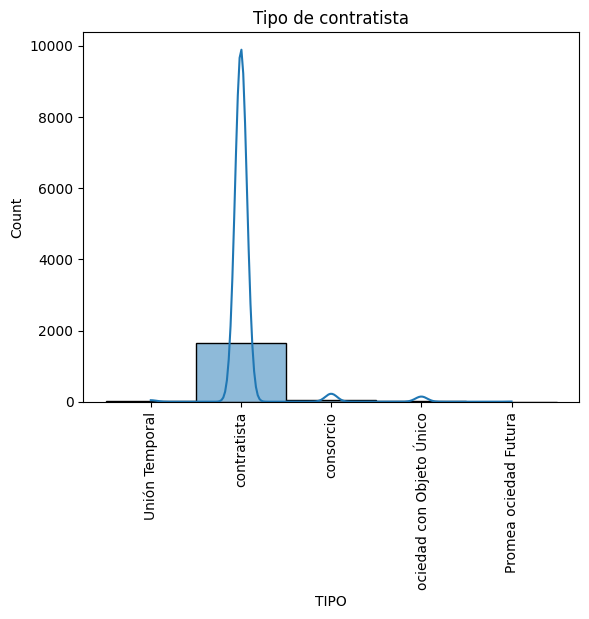

In [12]:
# Analisis de lo contratos segun el tipo
sns.histplot(df["TIPO"].dropna(), bins=5, kde=True)
plt.title('Tipo de contratista')
plt.xticks(rotation=90)  # Para que los nombres no salgan sobrepuestos
plt.show()

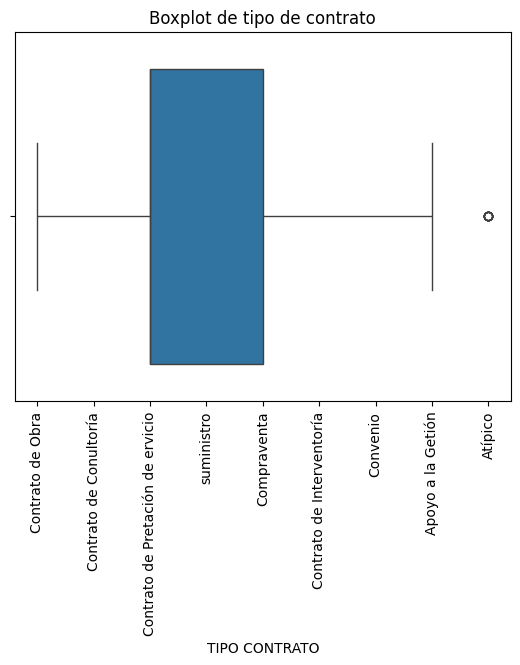

In [13]:
# Contratos segun el tipo de contrato
sns.boxplot(x=df["TIPO CONTRATO"])
plt.title('Boxplot de tipo de contrato')
plt.xticks(rotation=90)
plt.show()

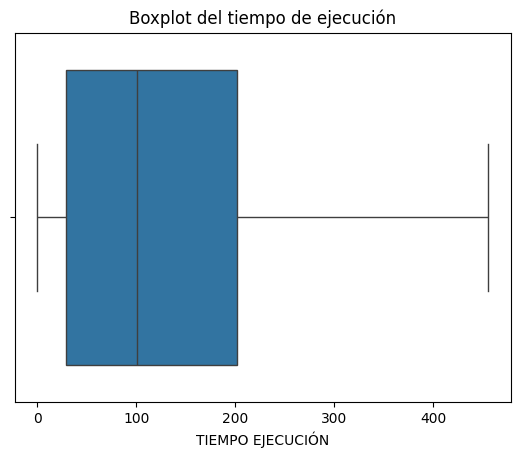

In [14]:
sns.boxplot(x=df["TIEMPO EJECUCIÓN"])
plt.title('Boxplot del tiempo de ejecución')
plt.show()

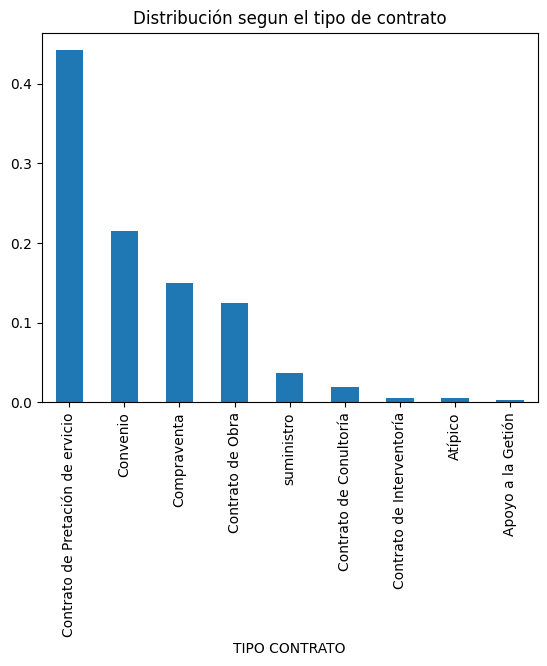

In [15]:
df["TIPO CONTRATO"].value_counts(normalize=True).plot(kind='bar')
plt.title('Distribución segun el tipo de contrato')
plt.xticks(rotation=90)
plt.show()

#Analsis bivariado

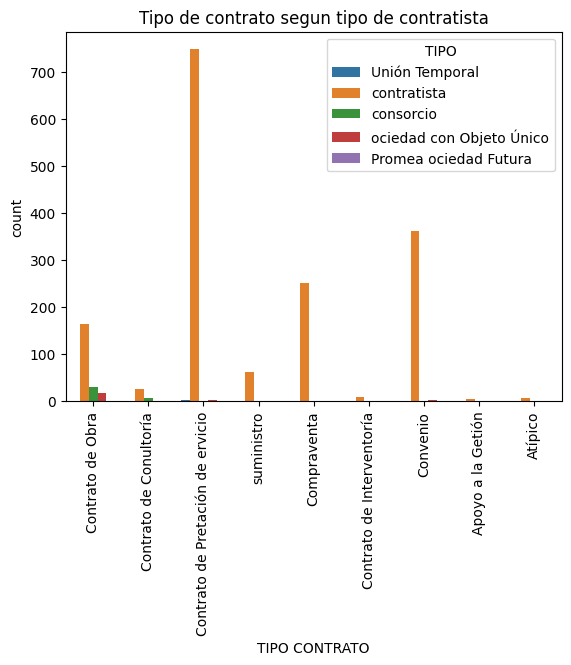

In [16]:
# Tipo de contrato ejecutado segun el tipo de contratista
sns.countplot(x="TIPO CONTRATO", hue="TIPO", data=df)
plt.title('Tipo de contrato segun tipo de contratista')
plt.xticks(rotation=90)
plt.show()

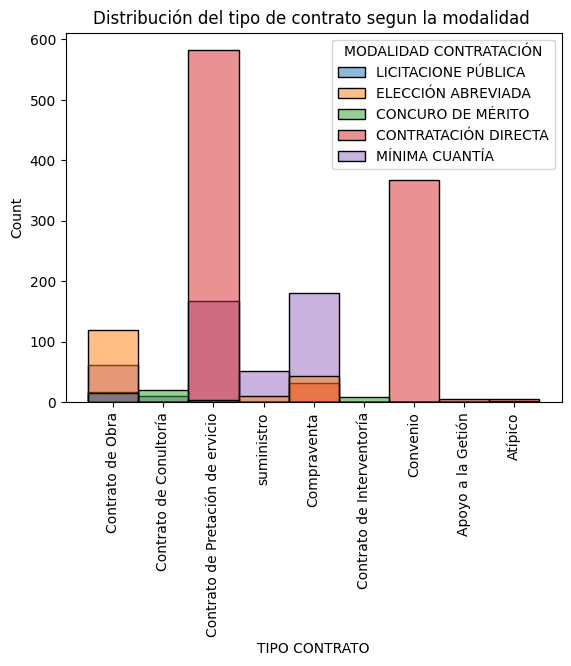

In [17]:
# Relación del tipo de contrato segun la modalidad de contratación
sns.histplot(data=df, x="TIPO CONTRATO", hue="MODALIDAD CONTRATACIÓN", bins=30)
plt.title('Distribución del tipo de contrato segun la modalidad ')
plt.xticks(rotation=90)
plt.show()

#Analisis multivariado

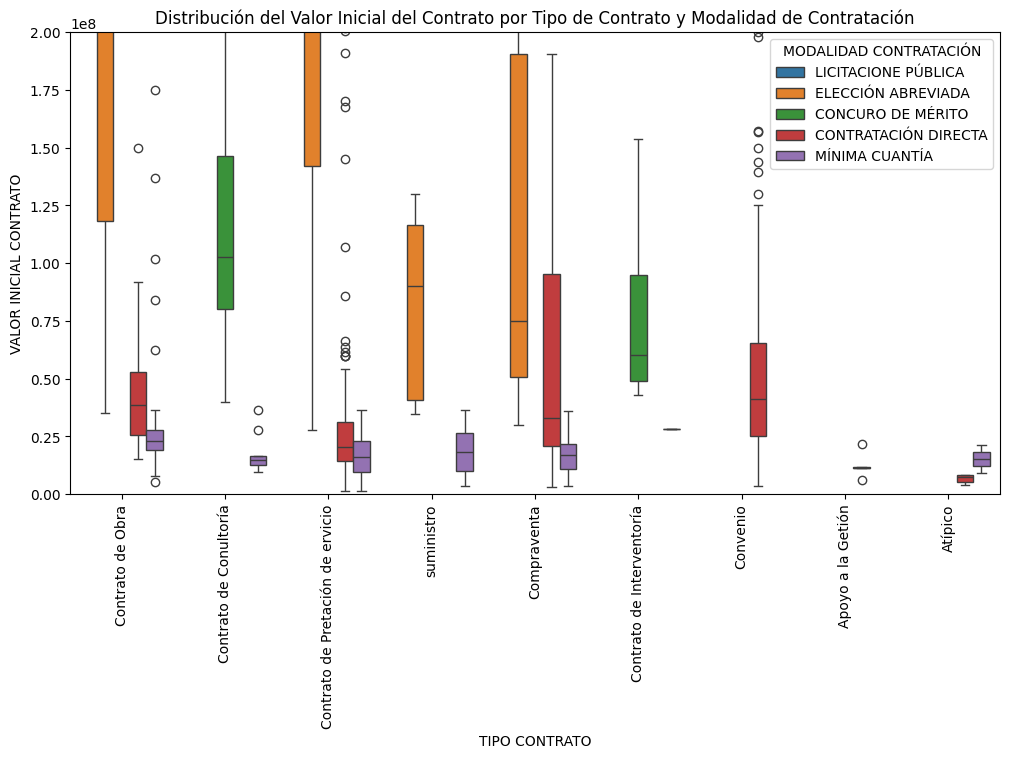

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='TIPO CONTRATO', y='VALOR INICIAL CONTRATO', hue='MODALIDAD CONTRATACIÓN', data=df)
plt.title('Distribución del Valor Inicial del Contrato por Tipo de Contrato y Modalidad de Contratación')
plt.xticks(rotation=90)
plt.ylim(0, 2e8) # Se limita para visualuizar mejor los datos
plt.show()

#Correlación

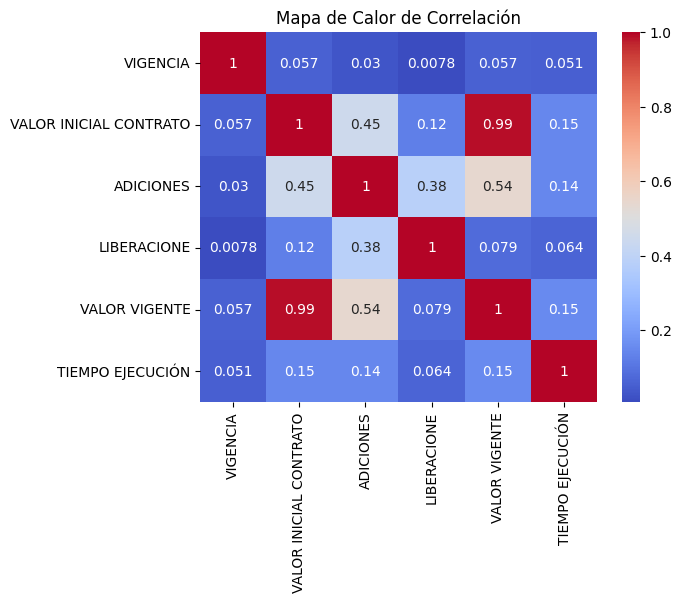

In [19]:
# Factores númericos del dataset
corr = df.corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación')
plt.show()

# EDA IA

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1720 entries, 0 to 1719
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ENTIDAD                     1720 non-null   object 
 1   VIGENCIA                    1698 non-null   float64
 2   CÓDIGO CONTRATO             1706 non-null   object 
 3   VALOR INICIAL CONTRATO      1706 non-null   float64
 4   ADICIONES                   1706 non-null   float64
 5   LIBERACIONE                 1706 non-null   float64
 6   VALOR VIGENTE               1706 non-null   float64
 7   FECHA SUCRIPCION            1706 non-null   object 
 8   FECHA ACTA DE INICIO        1706 non-null   object 
 9   FECHA TERMINACION           1706 non-null   object 
 10  TIEMPO EJECUCIÓN            1706 non-null   float64
 11  MODALIDAD CONTRATACIÓN      1706 non-null   object 
 12  CAUAL CONTRATO              1706 non-null   object 
 13

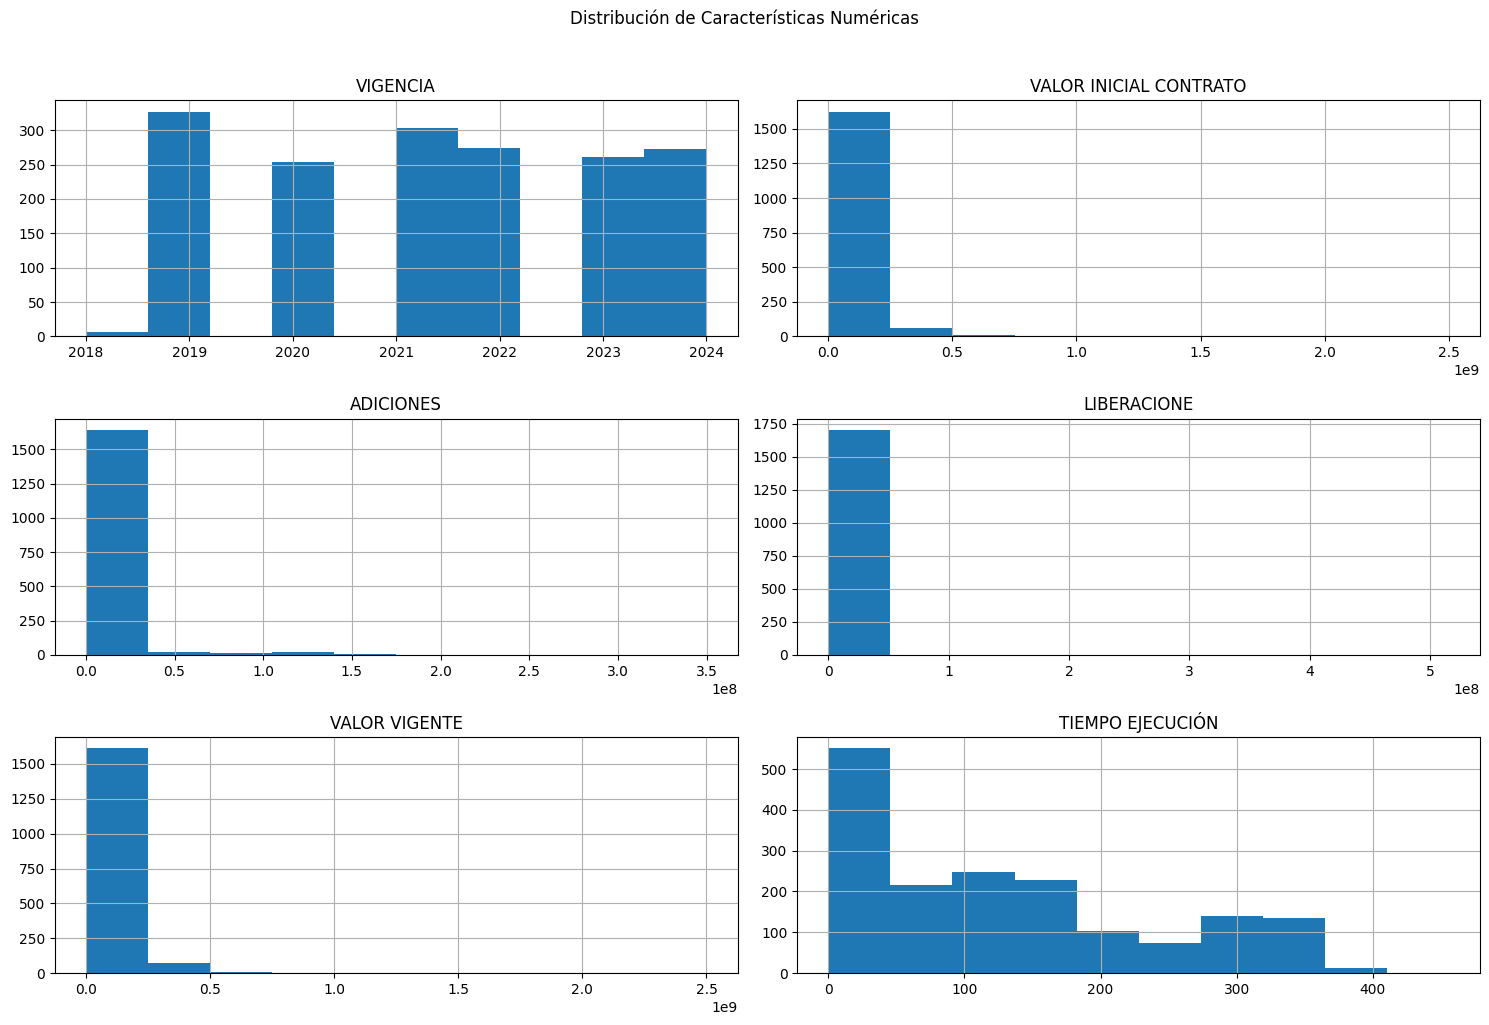

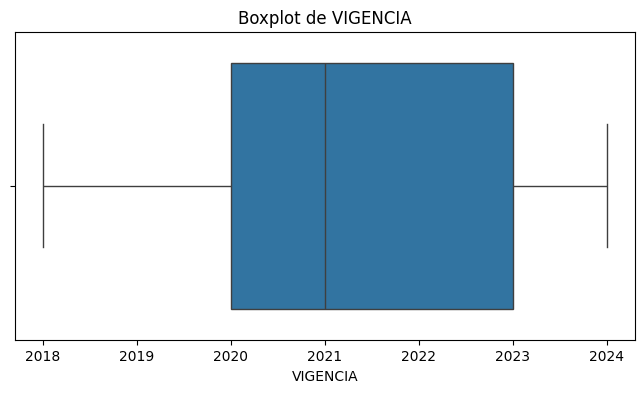

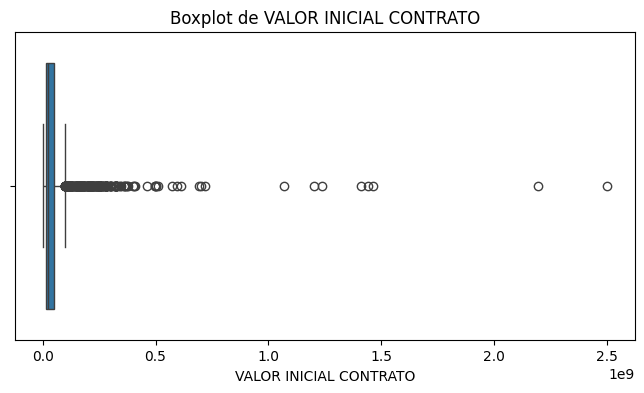

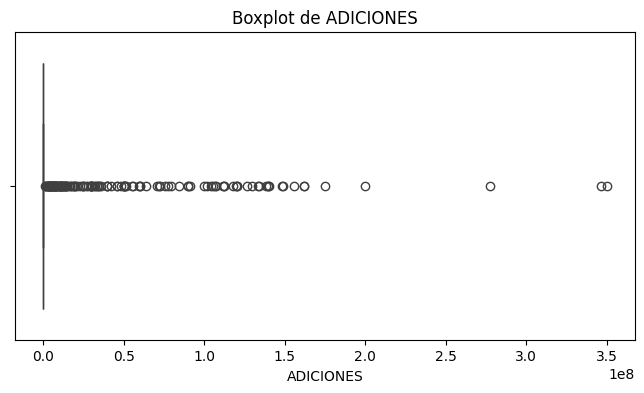

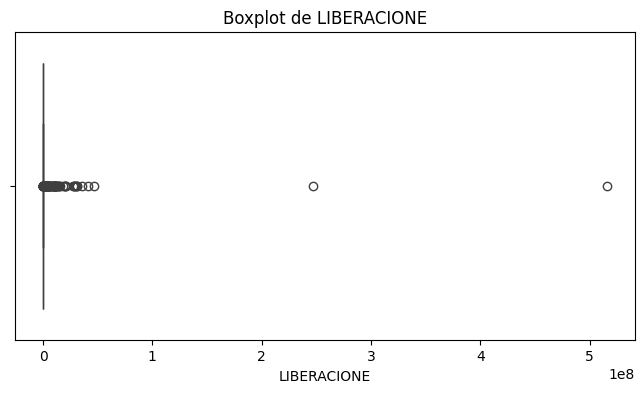

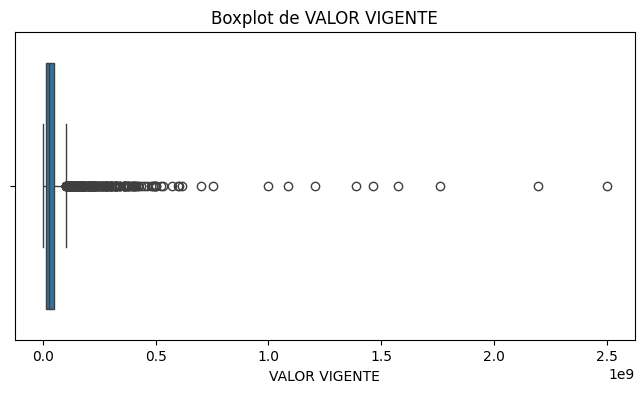

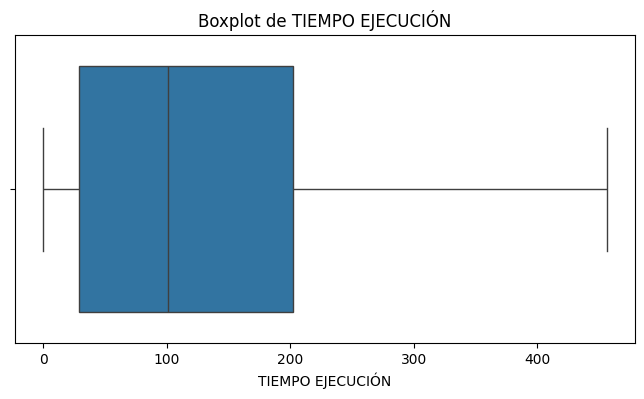


Visualización de distribuciones categóricas:


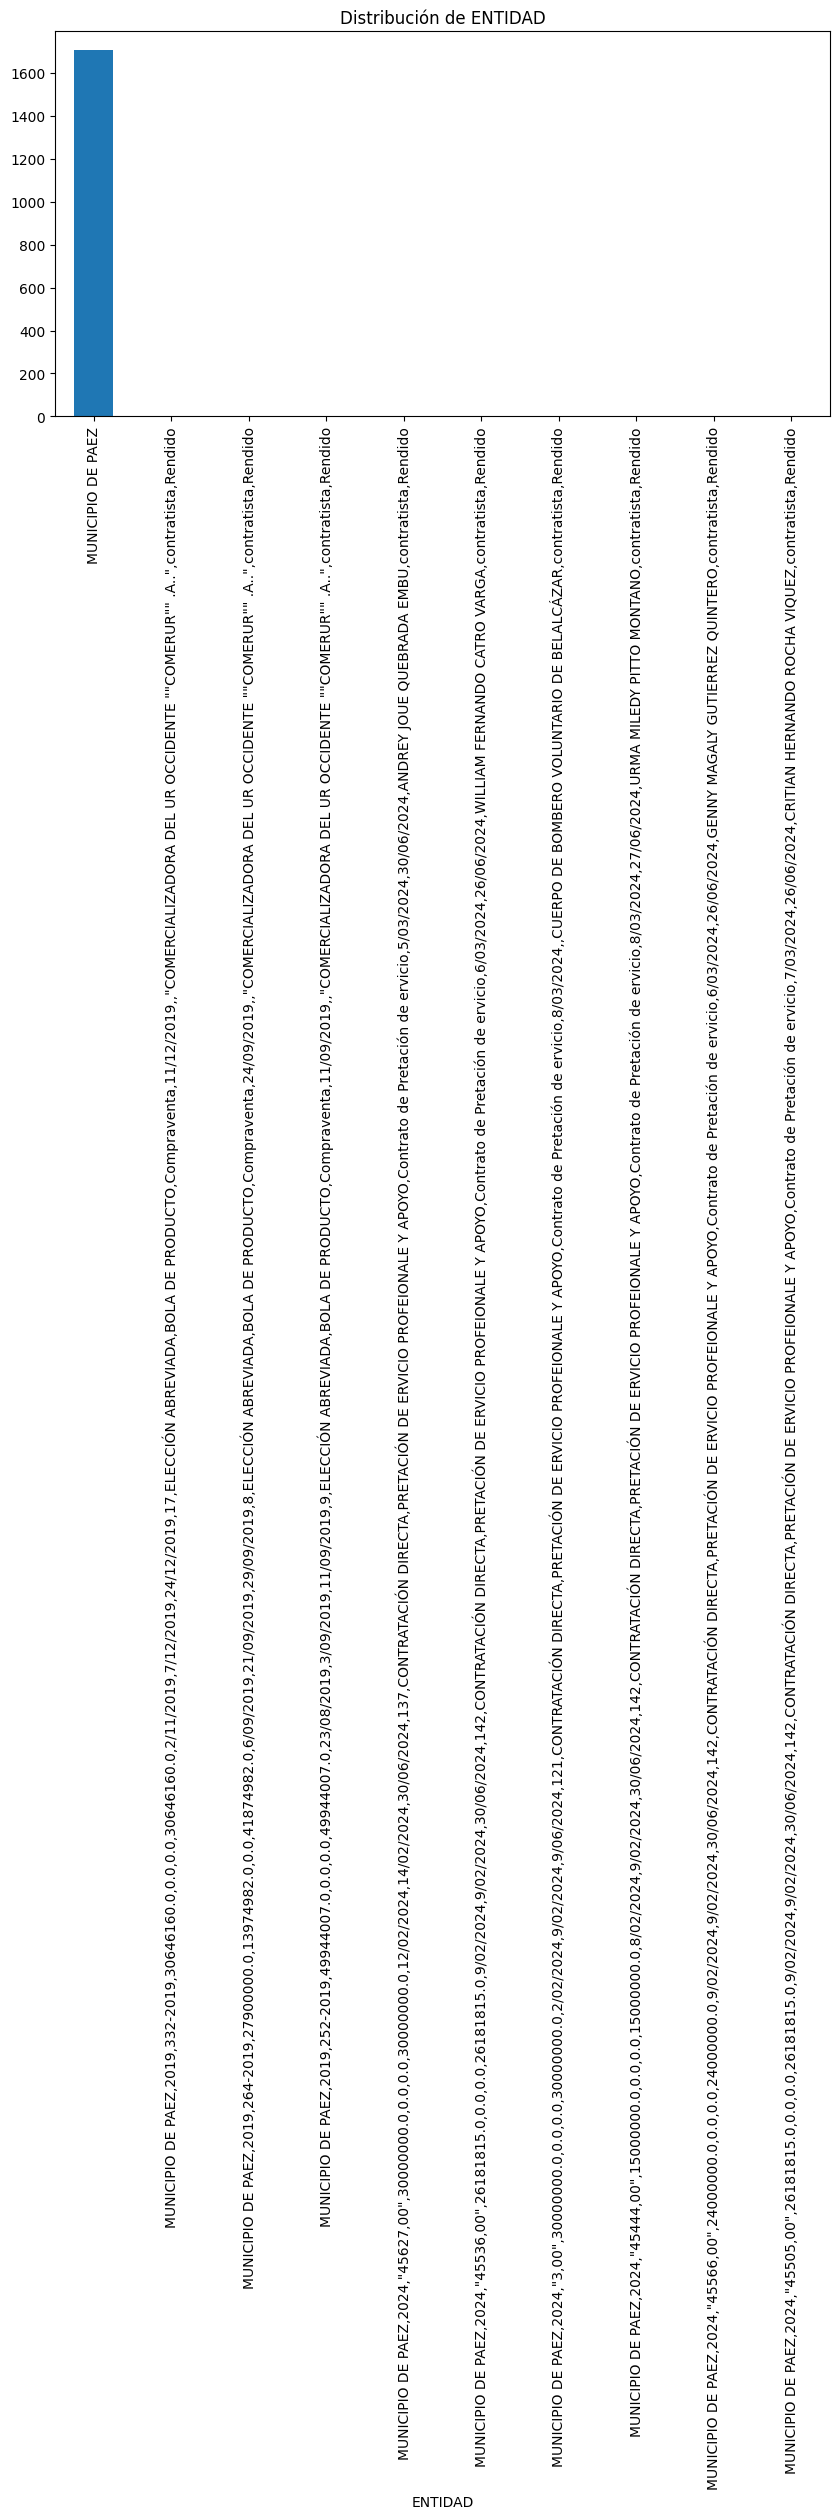

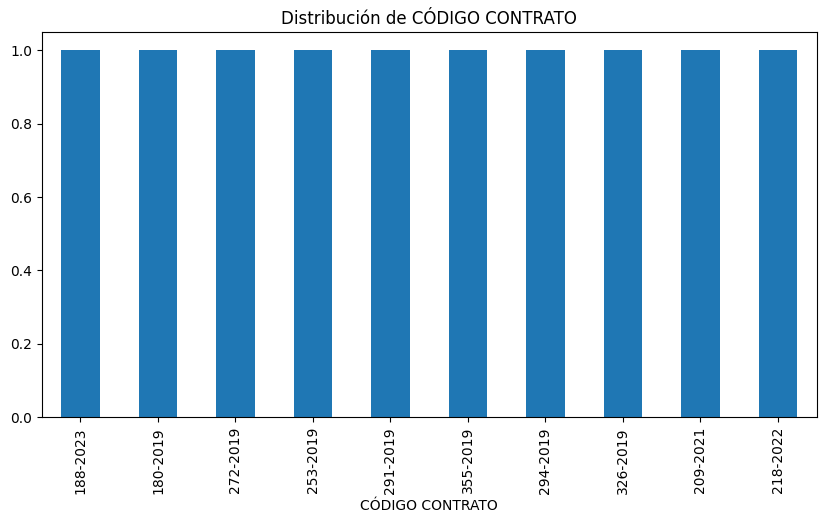

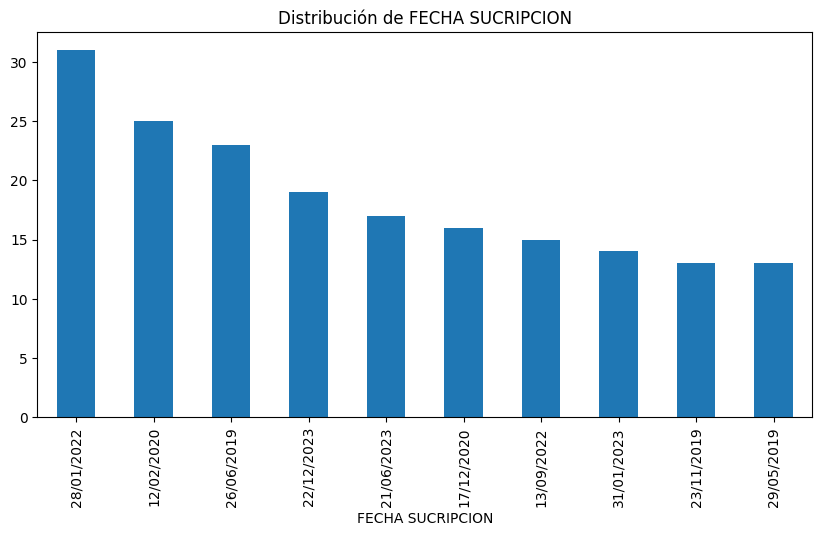

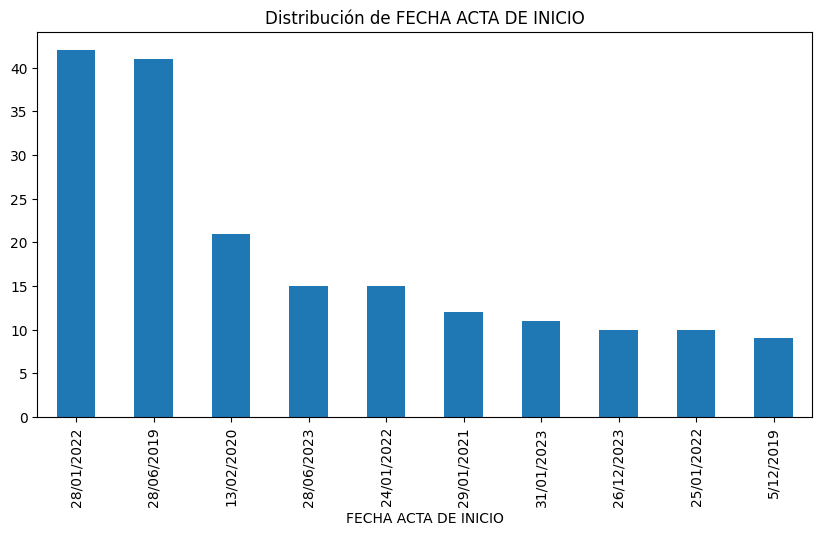

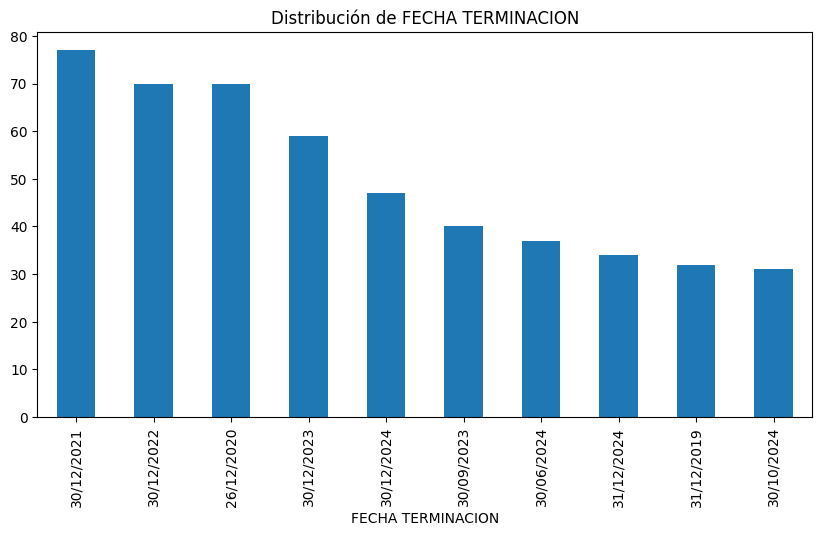

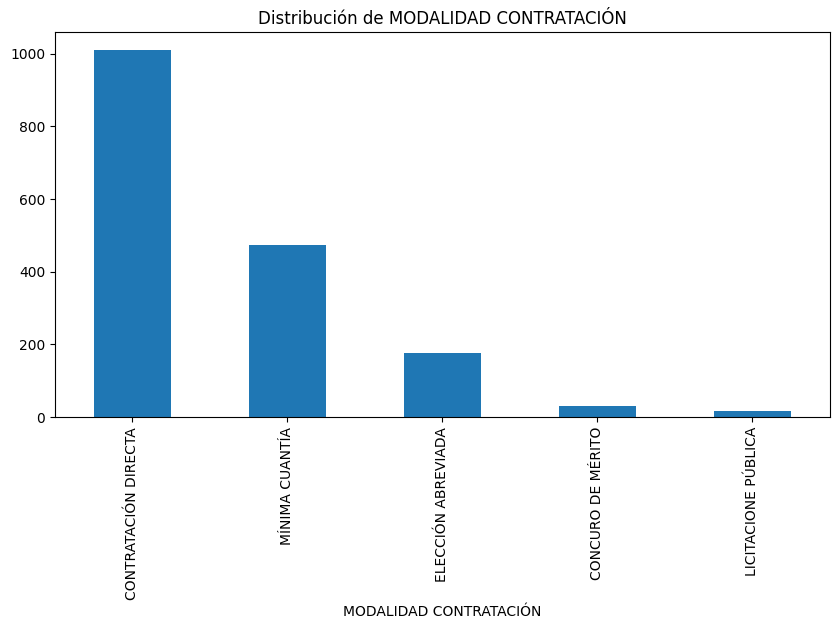

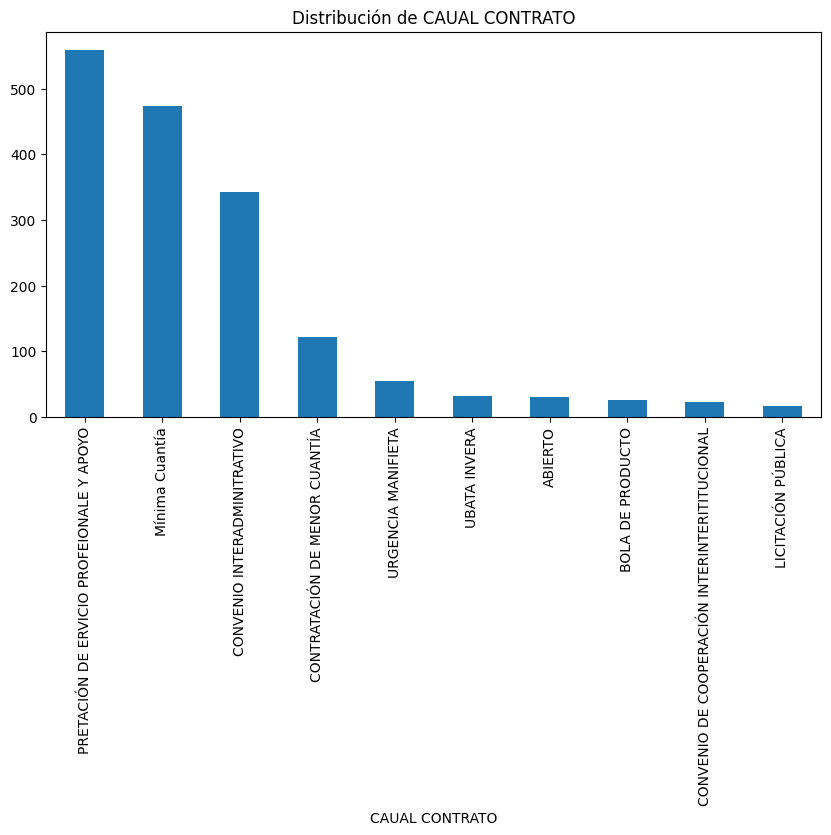

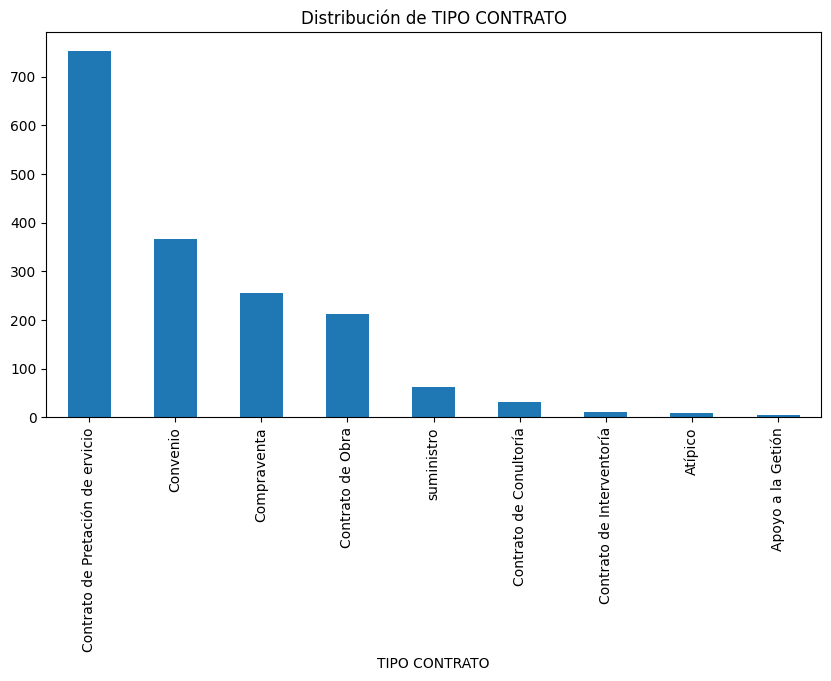

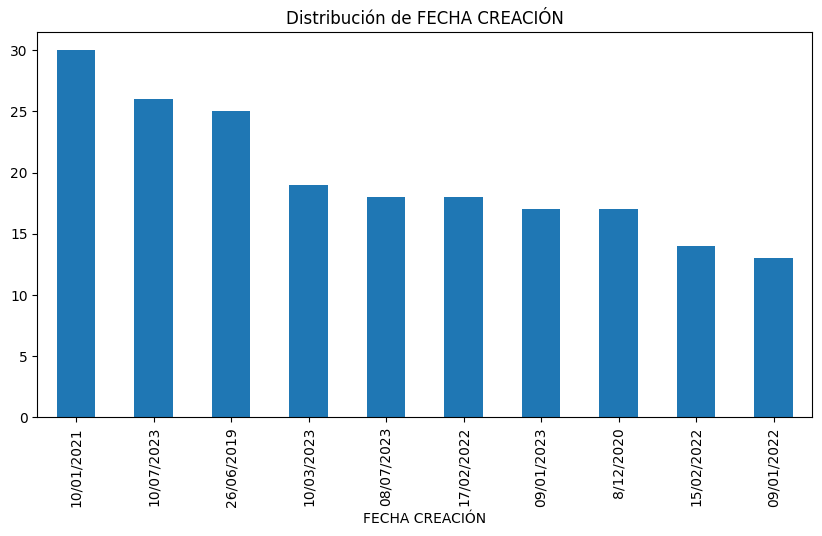

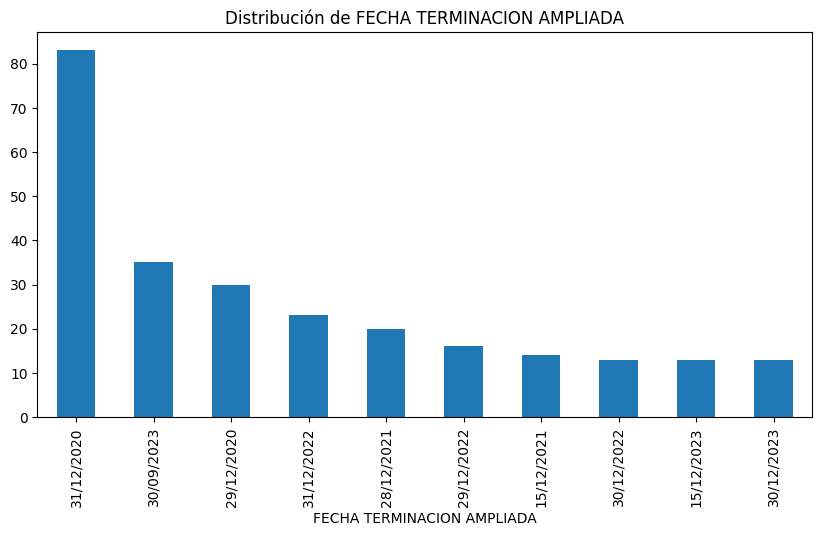

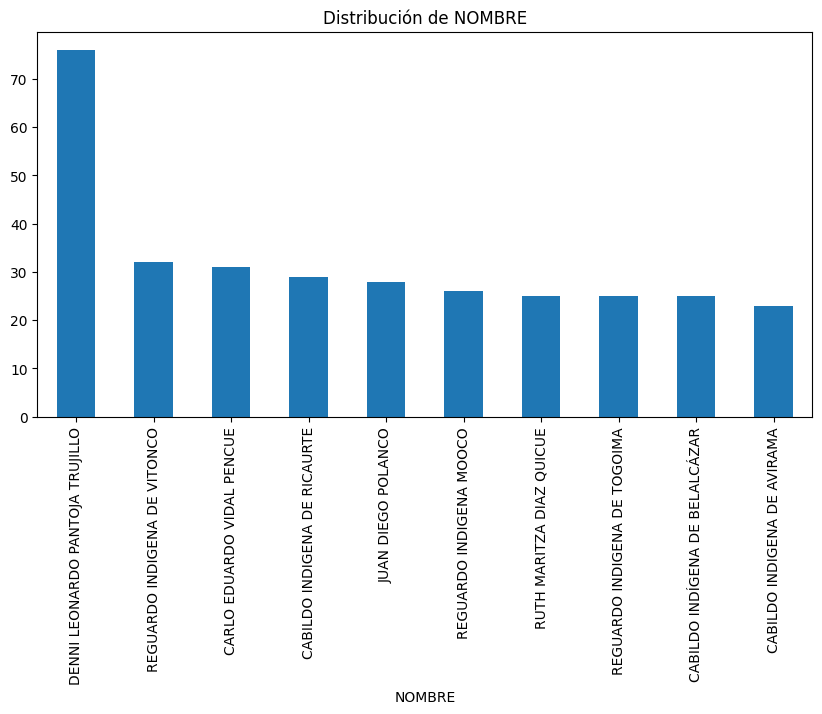

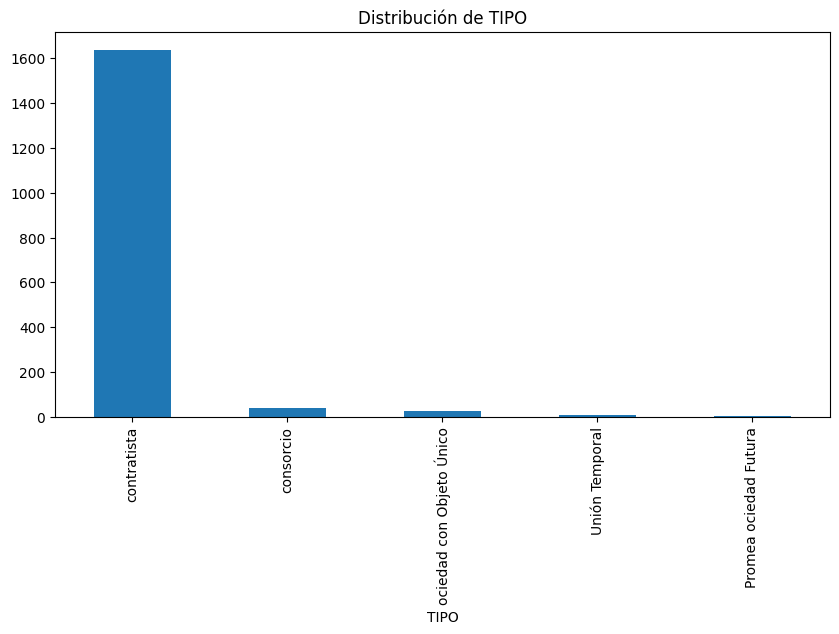

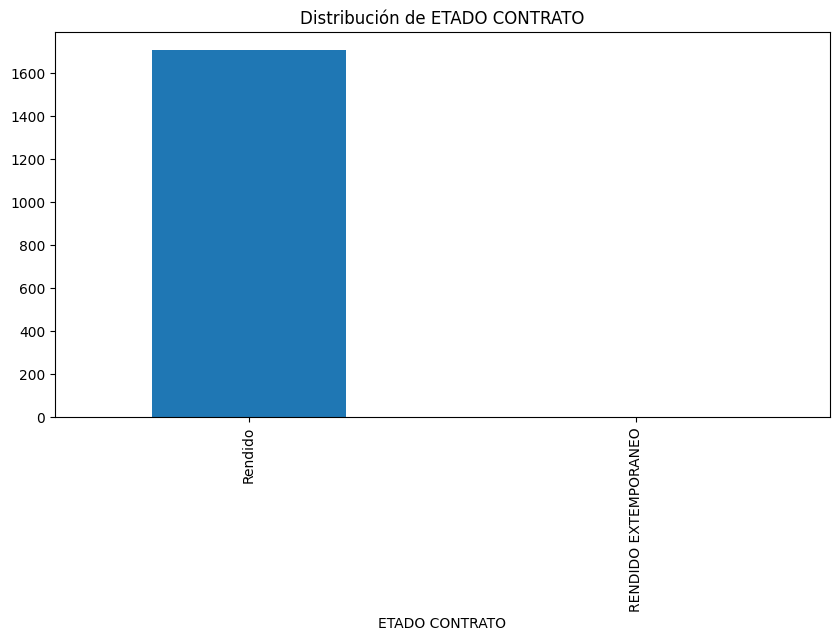


Análisis bivariado (ejemplos):


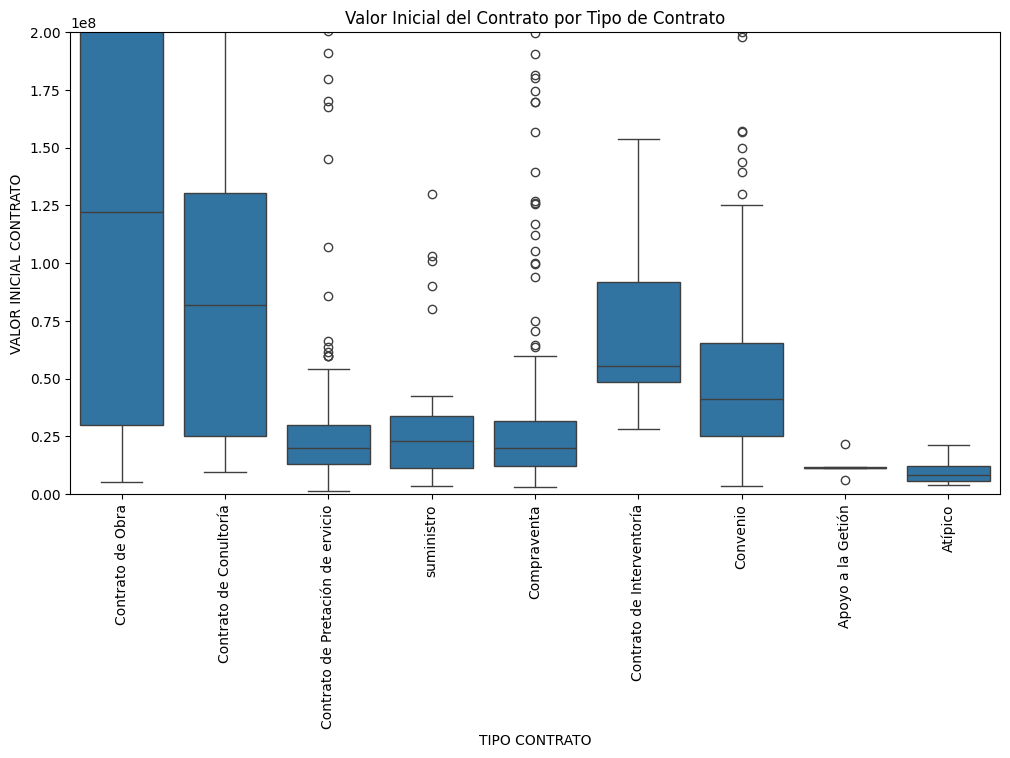

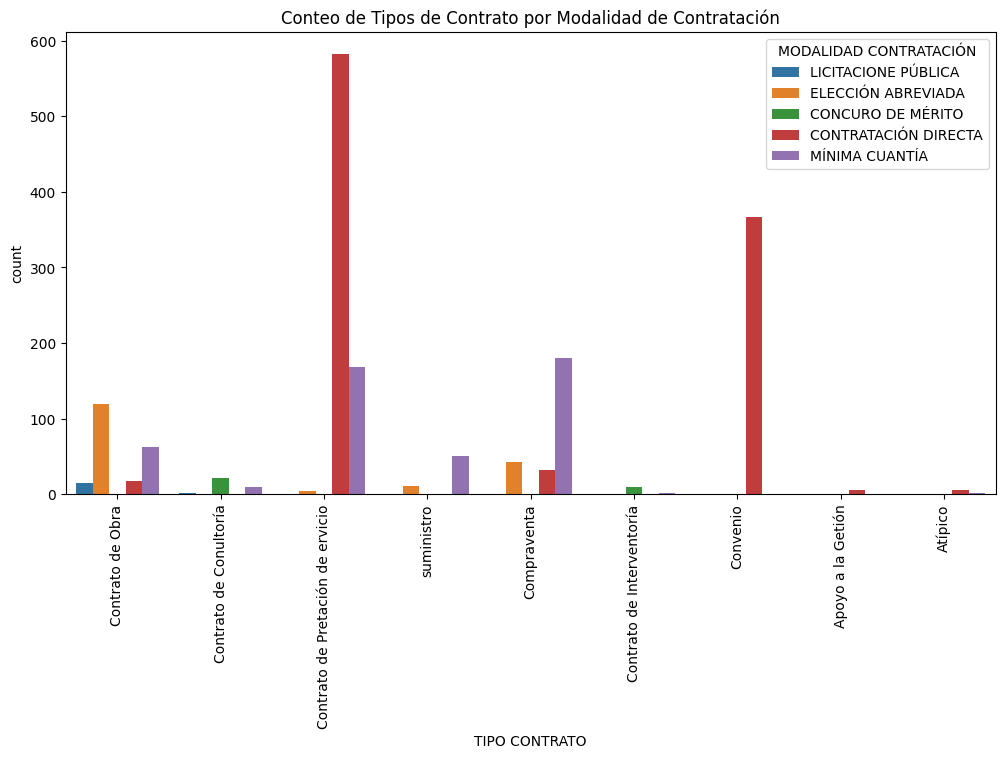

In [20]:
# 1. Información general del DataFrame
print("Información general del DataFrame:")
df.info()

# 2. Estadísticas descriptivas
print("\nEstadísticas descriptivas de columnas numéricas:")
print(df.describe())

print("\nEstadísticas descriptivas de columnas categóricas:")
print(df.describe(include='object'))

# 3. Verificación de valores nulos
print("\nConteo de valores nulos por columna:")
print(df.isnull().sum())

# 4. Análisis de columnas categóricas (valores únicos y frecuencia)
print("\nAnálisis de columnas categóricas:")
for col in df.select_dtypes(include='object').columns:
    print(f"\nColumna: {col}")
    print(f"Número de valores únicos: {df[col].nunique()}")
    print("Conteo de valores:")
    print(df[col].value_counts().head()) # Mostrar los 5 valores más frecuentes

# 5. Visualización de distribuciones numéricas (histogramas y boxplots)
print("\nVisualización de distribuciones numéricas:")
df.hist(figsize=(15, 10))
plt.suptitle('Distribución de Características Numéricas', y=1.02)
plt.tight_layout()
plt.show()

# Boxplots para identificar outliers en columnas numéricas
for col in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

# 6. Visualización de distribuciones categóricas (gráficos de barras)
print("\nVisualización de distribuciones categóricas:")
for col in df.select_dtypes(include='object').columns:
    plt.figure(figsize=(10, 5))
    df[col].value_counts().head(10).plot(kind='bar') # Mostrar los 10 valores más frecuentes
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=90)
    plt.show()

# 7. Análisis de correlación entre variables numéricas (heatmap ya realizado, se puede incluir de nuevo si se desea)
# print("\nAnálisis de correlación entre variables numéricas:")
# corr = df.corr(numeric_only=True)
# plt.figure(figsize=(10, 8))
# sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Mapa de Calor de Correlación entre Variables Numéricas')
# plt.show()

# 8. Análisis bivariado (ejemplos)
print("\nAnálisis bivariado (ejemplos):")

# Ejemplo: Relación entre Tipo de Contrato y Valor Inicial del Contrato (Boxplot)
plt.figure(figsize=(12, 6))
sns.boxplot(x='TIPO CONTRATO', y='VALOR INICIAL CONTRATO', data=df)
plt.title('Valor Inicial del Contrato por Tipo de Contrato')
plt.xticks(rotation=90)
plt.ylim(0, 2e8) # Limitar el eje y para mejor visualización
plt.show()

# Ejemplo: Conteo de Tipos de Contrato por Modalidad de Contratación (Countplot)
plt.figure(figsize=(12, 6))
sns.countplot(x='TIPO CONTRATO', hue='MODALIDAD CONTRATACIÓN', data=df)
plt.title('Conteo de Tipos de Contrato por Modalidad de Contratación')
plt.xticks(rotation=90)
plt.show()

Basado en el Análisis Exploratorio de Datos detallado que hemos realizado, aquí tienes algunas conclusiones generales sobre el conjunto de datos:

Datos Faltantes: Identificamos que existen valores faltantes en varias columnas, siendo 'FECHA TERMINACION AMPLIADA' la que tiene un porcentaje significativo de datos nulos. También hay un pequeño número de nulos en columnas clave como 'VIGENCIA', 'CÓDIGO CONTRATO', 'VALOR INICIAL CONTRATO', y las columnas de fecha y tipo de contrato. Manejar estos nulos será crucial para análisis posteriores.
Variables Numéricas: Las columnas numéricas como 'VALOR INICIAL CONTRATO', 'ADICIONES', 'LIBERACIONE', 'VALOR VIGENTE' y 'TIEMPO EJECUCIÓN' muestran una amplia dispersión, con la presencia de posibles valores atípicos (outliers) evidentes en los boxplots. Esto sugiere que la mayoría de los contratos tienen valores y tiempos de ejecución relativamente bajos, pero existen algunos contratos con valores y tiempos significativamente más altos. La columna 'VIGENCIA' parece estar limpia y representa los años de los contratos.
Variables Categóricas: Las columnas categóricas como 'ENTIDAD', 'MODALIDAD CONTRATACIÓN', 'CAUAL CONTRATO', 'TIPO CONTRATO', 'NOMBRE', 'TIPO' y 'ETADO CONTRATO' presentan varias categorías. En particular:
La mayoría de los contratos pertenecen a la entidad "MUNICIPIO DE PAEZ". Hay algunas filas que parecen contener información de varias columnas en una sola entrada en la columna 'ENTIDAD', lo cual podría ser un problema de formato a corregir.
La 'MODALIDAD CONTRATACIÓN' más frecuente es la 'CONTRATACIÓN DIRECTA'.
El 'TIPO CONTRATO' más común es 'Contrato de Pretación de ervicio'.
Hay una variedad considerable de 'NOMBRES' de contratistas, con algunos que se repiten frecuentemente.
El 'TIPO' de contratista predominante es 'contratista'.
El 'ETADO CONTRATO' es casi siempre 'Rendido'.
Relaciones:
El mapa de calor de correlación mostró una fuerte correlación positiva entre 'VALOR INICIAL CONTRATO' y 'VALOR VIGENTE', lo cual es esperado ya que el valor vigente se deriva del valor inicial más las adiciones menos las liberaciones. También hay una correlación moderada entre 'VALOR INICIAL CONTRATO' y 'ADICIONES'.
El análisis bivariado (boxplots y countplots) sugiere que el 'VALOR INICIAL CONTRATO' varía significativamente entre los diferentes 'TIPOS DE CONTRATO' y 'MODALIDADES DE CONTRATACIÓN', y que ciertas modalidades se asocian más a menudo con tipos de contrato específicos.
En resumen, el conjunto de datos contiene información valiosa sobre los contratos, pero requiere una limpieza y preprocesamiento adicionales para manejar los valores faltantes y las posibles inconsistencias de formato antes de realizar análisis más profundos o construir modelos.

## Análisis Exploratorio de Datos (EDA) Detallado

En esta sección, realizaremos un análisis exploratorio de datos más profundo para comprender mejor la estructura, el contenido y las relaciones dentro de nuestro conjunto de datos de contratos.

### 1. Información General del DataFrame

Utilizamos el método `df.info()` para obtener un resumen conciso del DataFrame, incluyendo el número de filas y columnas, los nombres de las columnas, los tipos de datos y la cantidad de valores no nulos en cada columna. Esto nos ayuda a identificar rápidamente las columnas y los tipos de datos con los que estamos trabajando, así como la presencia de valores faltantes.

### 2. Estadísticas Descriptivas

El método `df.describe()` nos proporciona estadísticas descriptivas clave para las columnas numéricas (conteo, media, desviación estándar, valores mínimo y máximo, y cuartiles) y para las columnas categóricas (conteo, número de valores únicos, el valor más frecuente y su frecuencia). Esto nos da una idea de la distribución y variabilidad de los datos.

### 3. Verificación de Valores Nulos

Aunque `df.info()` nos da un conteo rápido de valores no nulos, `df.isnull().sum()` nos proporciona el número exacto de valores nulos para cada columna. Esto es crucial para decidir cómo manejar los datos faltantes en las etapas de limpieza.

### 4. Análisis de Columnas Categóricas

Para las columnas categóricas, es importante entender la variedad de valores únicos y la frecuencia con la que aparece cada valor. Iteramos sobre estas columnas para mostrar el número de valores únicos y los valores más frecuentes con sus conteos. Esto puede revelar inconsistencias o valores que necesitan ser agrupados.

### 5. Visualización de Distribuciones Numéricas

Visualizar la distribución de las variables numéricas nos ayuda a identificar su forma, posibles sesgos y la presencia de outliers. Utilizamos histogramas para ver la frecuencia de los valores dentro de rangos y boxplots para identificar la mediana, los cuartiles y los valores atípicos.

### 6. Visualización de Distribuciones Categóricas

Los gráficos de barras son útiles para visualizar la frecuencia de las diferentes categorías en las columnas categóricas. Mostramos los valores más frecuentes para tener una idea de las categorías dominantes.

### 7. Análisis de Correlación entre Variables Numéricas

Un mapa de calor de correlación (`sns.heatmap`) nos muestra la fuerza y dirección de la relación lineal entre pares de variables numéricas. Los valores cercanos a 1 o -1 indican una fuerte correlación positiva o negativa, respectivamente, mientras que los valores cercanos a 0 indican poca correlación lineal.

### 8. Análisis Bivariado

Para explorar las relaciones entre pares de variables, realizamos análisis bivariados. Mostramos ejemplos como la relación entre el tipo de contrato y el valor inicial (usando un boxplot para comparar distribuciones de valores numéricos entre categorías) y el conteo de tipos de contrato por modalidad de contratación (usando un countplot para ver la distribución conjunta de dos variables categóricas). Estos gráficos nos ayudan a identificar patrones e interacciones entre diferentes características.

Número de filas duplicadas: 0

Análisis de características categóricas:

Columna: ENTIDAD
ENTIDAD
MUNICIPIO DE PAEZ                                                                                                                                                                                                                                                             1706
MUNICIPIO DE PAEZ,2019,332-2019,30646160.0,0.0,0.0,30646160.0,2/11/2019,7/12/2019,24/12/2019,17,ELECCIÓN ABREVIADA,BOLA DE PRODUCTO,Compraventa,11/12/2019,,"COMERCIALIZADORA DEL UR OCCIDENTE ""COMERUR"" .A..",contratista,Rendido                                             1
MUNICIPIO DE PAEZ,2019,264-2019,27900000.0,13974982.0,0.0,41874982.0,6/09/2019,21/09/2019,29/09/2019,8,ELECCIÓN ABREVIADA,BOLA DE PRODUCTO,Compraventa,24/09/2019,,"COMERCIALIZADORA DEL UR OCCIDENTE ""COMERUR"" .A..",contratista,Rendido                                      1
MUNICIPIO DE PAEZ,2019,252-2019,49944007.0,0.0,0.0,49944007.0,23/08/2019,3/09

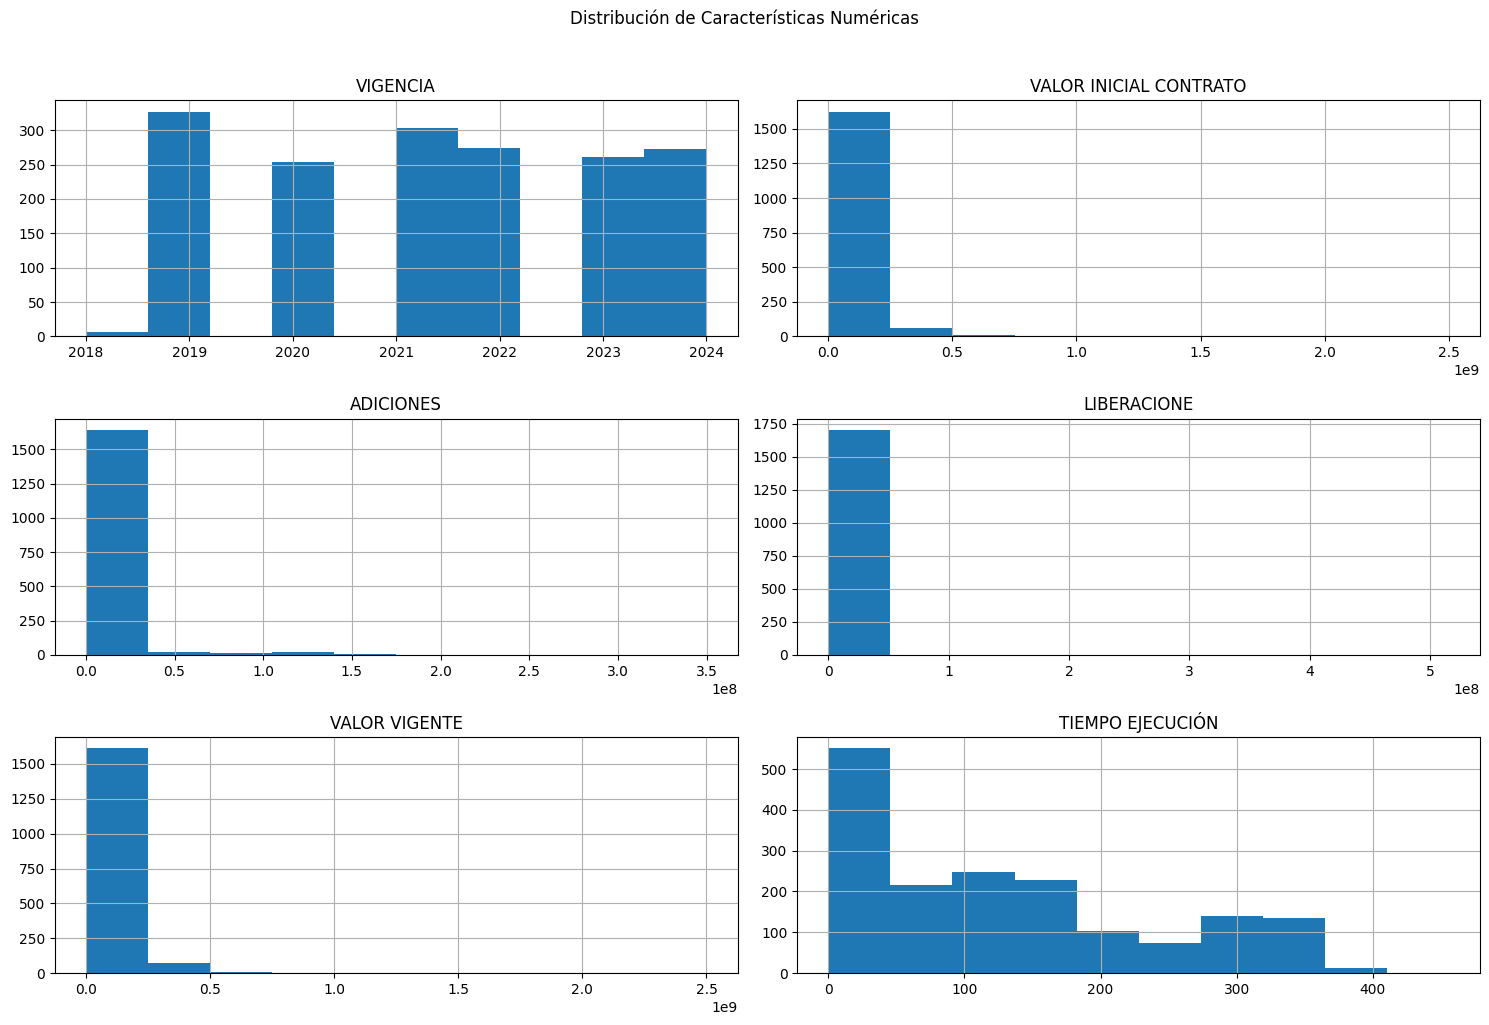

In [21]:
# Verificar duplicados
print("Número de filas duplicadas:", df.duplicated().sum())

# Análisis de características categóricas
print("\nAnálisis de características categóricas:")
for col in df.select_dtypes(include='object').columns:
    print(f"\nColumna: {col}")
    print(df[col].value_counts())

# Análisis de características numéricas
print("\nAnálisis de características numéricas:")
print(df.describe())

# Visualización de distribuciones de características numéricas
df.hist(figsize=(15, 10))
plt.suptitle('Distribución de Características Numéricas', y=1.02)
plt.tight_layout()
plt.show()

# Visualización de relaciones entre características numéricas (heatmap de correlación ya realizado, se puede omitir si no se necesita)
# sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
# plt.title('Mapa de Calor de Correlación')
# plt.show()

# Puedes añadir más visualizaciones según las características específicas que te interesen
# Por ejemplo, boxplots para outliers, gráficos de barras para recuentos de categorías, etc.


#Limpieza y procesamientos de datos


In [22]:
duplicados =  df.duplicated().sum()
duplicados

np.int64(0)

In [23]:
duplicados_columnas = df[df.duplicated()]
duplicados_columnas

,ENTIDAD,VIGENCIA,CÓDIGO CONTRATO,VALOR INICIAL CONTRATO,ADICIONES,LIBERACIONE,VALOR VIGENTE,FECHA SUCRIPCION,FECHA ACTA DE INICIO,FECHA TERMINACION,TIEMPO EJECUCIÓN,MODALIDAD CONTRATACIÓN,CAUAL CONTRATO,TIPO CONTRATO,FECHA CREACIÓN,FECHA TERMINACION AMPLIADA,NOMBRE,TIPO,ETADO CONTRATO


In [24]:
# Revisión de datos nulos
nulos = df.isnull().sum()
nulos

,0
ENTIDAD,0
VIGENCIA,22
CÓDIGO CONTRATO,14
VALOR INICIAL CONTRATO,14
ADICIONES,14
LIBERACIONE,14
VALOR VIGENTE,14
FECHA SUCRIPCION,14
FECHA ACTA DE INICIO,14
FECHA TERMINACION,14


In [25]:
#Porcentaje de datos nulos por columna
pct_nulos = df.isnull().mean()*100
pct_nulos

,0
ENTIDAD,0.000000
VIGENCIA,1.279070
CÓDIGO CONTRATO,0.813953
VALOR INICIAL CONTRATO,0.813953
ADICIONES,0.813953
LIBERACIONE,0.813953
VALOR VIGENTE,0.813953
FECHA SUCRIPCION,0.813953
FECHA ACTA DE INICIO,0.813953
FECHA TERMINACION,0.813953


In [26]:
# Reemplazar los valores faltantes (Imputación de datos)
df_copy = df.copy()

In [27]:
df_copy.head(3)

,ENTIDAD,VIGENCIA,CÓDIGO CONTRATO,VALOR INICIAL CONTRATO,ADICIONES,LIBERACIONE,VALOR VIGENTE,FECHA SUCRIPCION,FECHA ACTA DE INICIO,FECHA TERMINACION,TIEMPO EJECUCIÓN,MODALIDAD CONTRATACIÓN,CAUAL CONTRATO,TIPO CONTRATO,FECHA CREACIÓN,FECHA TERMINACION AMPLIADA,NOMBRE,TIPO,ETADO CONTRATO
0,MUNICIPIO DE PAEZ,2019.0,180-2019,1.441315e+09,134275963.0,0.0,1.575591e+09,25/06/2019,01/08/2019,01/04/2020,302.0,LICITACIONE PÚBLICA,LICITACIÓN PÚBLICA,Contrato de Obra,01/08/2019,15/09/2022,UNION TEMPORAL CUBIERTA 2019,Unión Temporal,Rendido
1,MUNICIPIO DE PAEZ,NaN,272-2019,3.453235e+08,50283488.0,0.0,3.956070e+08,18/09/2019,26/09/2019,26/01/2020,180.0,LICITACIONE PÚBLICA,LICITACIÓN PÚBLICA,Contrato de Obra,26/09/2019,30/03/2022,DIEGO ARMANDO LOPEZ GONZALEZ,contratista,Rendido
2,MUNICIPIO DE PAEZ,2019.0,253-2019,7.199219e+08,277731255.0,0.0,9.976531e+08,23/08/2019,27/09/2019,27/02/2020,390.0,LICITACIONE PÚBLICA,LICITACIÓN PÚBLICA,Contrato de Obra,27/09/2019,8/10/2021,consorcio POLIDEPORTIVO PAEZ,consorcio,Rendido


In [28]:
# Reemplazar valores faltantes con la mediana para columnas numéricas
for col in df_copy.select_dtypes(include=np.number).columns:
    median_val = df_copy[col].median()
    df_copy[col] = df_copy[col].fillna(median_val)

# Verificar si aún hay valores nulos
print(df_copy.isnull().sum())

ENTIDAD                         0
VIGENCIA                        0
CÓDIGO CONTRATO                14
VALOR INICIAL CONTRATO          0
ADICIONES                       0
LIBERACIONE                     0
VALOR VIGENTE                   0
FECHA SUCRIPCION               14
FECHA ACTA DE INICIO           14
FECHA TERMINACION              14
TIEMPO EJECUCIÓN                0
MODALIDAD CONTRATACIÓN         14
CAUAL CONTRATO                 14
TIPO CONTRATO                  14
FECHA CREACIÓN                 14
FECHA TERMINACION AMPLIADA    813
NOMBRE                         14
TIPO                           14
ETADO CONTRATO                 14
dtype: int64


In [29]:
df_copy.head(3)

,ENTIDAD,VIGENCIA,CÓDIGO CONTRATO,VALOR INICIAL CONTRATO,ADICIONES,LIBERACIONE,VALOR VIGENTE,FECHA SUCRIPCION,FECHA ACTA DE INICIO,FECHA TERMINACION,TIEMPO EJECUCIÓN,MODALIDAD CONTRATACIÓN,CAUAL CONTRATO,TIPO CONTRATO,FECHA CREACIÓN,FECHA TERMINACION AMPLIADA,NOMBRE,TIPO,ETADO CONTRATO
0,MUNICIPIO DE PAEZ,2019.0,180-2019,1.441315e+09,134275963.0,0.0,1.575591e+09,25/06/2019,01/08/2019,01/04/2020,302.0,LICITACIONE PÚBLICA,LICITACIÓN PÚBLICA,Contrato de Obra,01/08/2019,15/09/2022,UNION TEMPORAL CUBIERTA 2019,Unión Temporal,Rendido
1,MUNICIPIO DE PAEZ,2021.0,272-2019,3.453235e+08,50283488.0,0.0,3.956070e+08,18/09/2019,26/09/2019,26/01/2020,180.0,LICITACIONE PÚBLICA,LICITACIÓN PÚBLICA,Contrato de Obra,26/09/2019,30/03/2022,DIEGO ARMANDO LOPEZ GONZALEZ,contratista,Rendido
2,MUNICIPIO DE PAEZ,2019.0,253-2019,7.199219e+08,277731255.0,0.0,9.976531e+08,23/08/2019,27/09/2019,27/02/2020,390.0,LICITACIONE PÚBLICA,LICITACIÓN PÚBLICA,Contrato de Obra,27/09/2019,8/10/2021,consorcio POLIDEPORTIVO PAEZ,consorcio,Rendido


#Codificación categoricas

In [95]:
df_copy

,ENTIDAD,VIGENCIA,CÓDIGO CONTRATO,VALOR INICIAL CONTRATO,ADICIONES,LIBERACIONE,VALOR VIGENTE,FECHA SUCRIPCION,FECHA ACTA DE INICIO,FECHA TERMINACION,TIEMPO EJECUCIÓN,MODALIDAD CONTRATACIÓN,CAUAL CONTRATO,TIPO CONTRATO,FECHA CREACIÓN,FECHA TERMINACION AMPLIADA,NOMBRE,TIPO,ETADO CONTRATO,DURACION_CONTRATO_DIAS
0,MUNICIPIO DE PAEZ,2019.0,180-2019,1.441315e+09,134275963.0,0.0,1.575591e+09,25/06/2019,01/08/2019,01/04/2020,302.0,LICITACIONE PÚBLICA,LICITACIÓN PÚBLICA,Contrato de Obra,01/08/2019,15/09/2022,UNION TEMPORAL CUBIERTA 2019,Unión Temporal,Rendido,361.0
1,MUNICIPIO DE PAEZ,2021.0,272-2019,3.453235e+08,50283488.0,0.0,3.956070e+08,18/09/2019,26/09/2019,26/01/2020,180.0,LICITACIONE PÚBLICA,LICITACIÓN PÚBLICA,Contrato de Obra,26/09/2019,30/03/2022,DIEGO ARMANDO LOPEZ GONZALEZ,contratista,Rendido,0.0
2,MUNICIPIO DE PAEZ,2019.0,253-2019,7.199219e+08,277731255.0,0.0,9.976531e+08,23/08/2019,27/09/2019,27/02/2020,390.0,LICITACIONE PÚBLICA,LICITACIÓN PÚBLICA,Contrato de Obra,27/09/2019,8/10/2021,consorcio POLIDEPORTIVO PAEZ,consorcio,Rendido,0.0
3,MUNICIPIO DE PAEZ,2019.0,291-2019,5.959969e+08,156000000.0,775.0,7.519962e+08,15/10/2019,29/10/2019,29/01/2020,180.0,LICITACIONE PÚBLICA,LICITACIÓN PÚBLICA,Contrato de Obra,31/10/2019,29/08/2022,NELON HERNANDO PANTOJA TRUJILLO,contratista,Rendido,0.0
4,MUNICIPIO DE PAEZ,2021.0,355-2019,3.770614e+08,30000000.0,0.0,4.070614e+08,3/12/2019,17/12/2019,17/05/2020,301.0,LICITACIONE PÚBLICA,LICITACIÓN PÚBLICA,Contrato de Obra,17/12/2019,12/02/2021,ALBEIRO PLAZA Y AOCIADO .A.,ociedad con Objeto Único,Rendido,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1715,MUNICIPIO DE PAEZ,2023.0,248-2023,1.503659e+07,0.0,0.0,1.503659e+07,22/12/2023,23/12/2023,27/12/2023,4.0,MÍNIMA CUANTÍA,Mínima Cuantía,Contrato de Obra,09/01/2024,27/12/2023,JUAN DIEGO POLANCO,contratista,Rendido,0.0
1716,MUNICIPIO DE PAEZ,2023.0,244-2023,3.239168e+07,0.0,0.0,3.239168e+07,22/12/2023,22/12/2023,31/12/2023,9.0,MÍNIMA CUANTÍA,Mínima Cuantía,Contrato de Obra,08/01/2024,31/12/2023,EDGAR AUGUTO ARRIA BECA,contratista,Rendido,0.0
1717,MUNICIPIO DE PAEZ,2023.0,245-2023,2.271176e+07,0.0,444041.0,2.226772e+07,22/12/2023,22/12/2023,31/12/2023,9.0,MÍNIMA CUANTÍA,Mínima Cuantía,Contrato de Obra,08/01/2024,NaN,EDGAR AUGUTO ARRIA BECA,contratista,Rendido,0.0
1718,MUNICIPIO DE PAEZ,2023.0,246-2023,3.236442e+07,0.0,0.0,3.236442e+07,22/12/2023,22/12/2023,31/12/2023,9.0,MÍNIMA CUANTÍA,Mínima Cuantía,Contrato de Obra,10/01/2024,NaN,EDGAR AUGUTO ARRIA BECA,contratista,Rendido,0.0


In [86]:
df_copy["TIPO CONTRATO"].value_counts()

,count
TIPO CONTRATO,
Contrato de Pretación de ervicio,754
Convenio,367
Compraventa,255
Contrato de Obra,213
suministro,62
Contrato de Conultoría,32
Contrato de Interventoría,10
Atípico,8
Apoyo a la Getión,5


In [87]:
df_label = df_copy.copy()

In [88]:
label = LabelEncoder()
df_label['Tipo_cont_label'] = label.fit_transform(df_label['TIPO CONTRATO'])
df_label['Mod_cont_label'] = label.fit_transform(df_label['MODALIDAD CONTRATACIÓN'])
df_label['Tipo_label'] = label.fit_transform(df_label['TIPO'])
df_label

,ENTIDAD,VIGENCIA,CÓDIGO CONTRATO,VALOR INICIAL CONTRATO,ADICIONES,LIBERACIONE,VALOR VIGENTE,FECHA SUCRIPCION,FECHA ACTA DE INICIO,FECHA TERMINACION,...,CAUAL CONTRATO,TIPO CONTRATO,FECHA CREACIÓN,FECHA TERMINACION AMPLIADA,NOMBRE,TIPO,ETADO CONTRATO,Tipo_cont_label,Mod_cont_label,Tipo_label
0,MUNICIPIO DE PAEZ,2019.0,180-2019,1.441315e+09,134275963.0,0.0,1.575591e+09,25/06/2019,01/08/2019,01/04/2020,...,LICITACIÓN PÚBLICA,Contrato de Obra,01/08/2019,15/09/2022,UNION TEMPORAL CUBIERTA 2019,Unión Temporal,Rendido,5,3,1
1,MUNICIPIO DE PAEZ,2021.0,272-2019,3.453235e+08,50283488.0,0.0,3.956070e+08,18/09/2019,26/09/2019,26/01/2020,...,LICITACIÓN PÚBLICA,Contrato de Obra,26/09/2019,30/03/2022,DIEGO ARMANDO LOPEZ GONZALEZ,contratista,Rendido,5,3,3
2,MUNICIPIO DE PAEZ,2019.0,253-2019,7.199219e+08,277731255.0,0.0,9.976531e+08,23/08/2019,27/09/2019,27/02/2020,...,LICITACIÓN PÚBLICA,Contrato de Obra,27/09/2019,8/10/2021,consorcio POLIDEPORTIVO PAEZ,consorcio,Rendido,5,3,2
3,MUNICIPIO DE PAEZ,2019.0,291-2019,5.959969e+08,156000000.0,775.0,7.519962e+08,15/10/2019,29/10/2019,29/01/2020,...,LICITACIÓN PÚBLICA,Contrato de Obra,31/10/2019,29/08/2022,NELON HERNANDO PANTOJA TRUJILLO,contratista,Rendido,5,3,3
4,MUNICIPIO DE PAEZ,2021.0,355-2019,3.770614e+08,30000000.0,0.0,4.070614e+08,3/12/2019,17/12/2019,17/05/2020,...,LICITACIÓN PÚBLICA,Contrato de Obra,17/12/2019,12/02/2021,ALBEIRO PLAZA Y AOCIADO .A.,ociedad con Objeto Único,Rendido,5,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1715,MUNICIPIO DE PAEZ,2023.0,248-2023,1.503659e+07,0.0,0.0,1.503659e+07,22/12/2023,23/12/2023,27/12/2023,...,Mínima Cuantía,Contrato de Obra,09/01/2024,27/12/2023,JUAN DIEGO POLANCO,contratista,Rendido,5,4,3
1716,MUNICIPIO DE PAEZ,2023.0,244-2023,3.239168e+07,0.0,0.0,3.239168e+07,22/12/2023,22/12/2023,31/12/2023,...,Mínima Cuantía,Contrato de Obra,08/01/2024,31/12/2023,EDGAR AUGUTO ARRIA BECA,contratista,Rendido,5,4,3
1717,MUNICIPIO DE PAEZ,2023.0,245-2023,2.271176e+07,0.0,444041.0,2.226772e+07,22/12/2023,22/12/2023,31/12/2023,...,Mínima Cuantía,Contrato de Obra,08/01/2024,NaN,EDGAR AUGUTO ARRIA BECA,contratista,Rendido,5,4,3
1718,MUNICIPIO DE PAEZ,2023.0,246-2023,3.236442e+07,0.0,0.0,3.236442e+07,22/12/2023,22/12/2023,31/12/2023,...,Mínima Cuantía,Contrato de Obra,10/01/2024,NaN,EDGAR AUGUTO ARRIA BECA,contratista,Rendido,5,4,3


In [55]:
df_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1720 entries, 0 to 1719
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ENTIDAD                     1720 non-null   object 
 1   VIGENCIA                    1720 non-null   float64
 2   CÓDIGO CONTRATO             1706 non-null   object 
 3   VALOR INICIAL CONTRATO      1720 non-null   float64
 4   ADICIONES                   1720 non-null   float64
 5   LIBERACIONE                 1720 non-null   float64
 6   VALOR VIGENTE               1720 non-null   float64
 7   FECHA SUCRIPCION            1706 non-null   object 
 8   FECHA ACTA DE INICIO        1706 non-null   object 
 9   FECHA TERMINACION           1706 non-null   object 
 10  TIEMPO EJECUCIÓN            1720 non-null   float64
 11  MODALIDAD CONTRATACIÓN      1706 non-null   object 
 12  CAUAL CONTRATO              1706 non-null   object 
 13  TIPO CONTRATO               1706 

In [58]:
df_label["TIPO CONTRATO"].value_counts()

,count
TIPO CONTRATO,
Contrato de Pretación de ervicio,754
Convenio,367
Compraventa,255
Contrato de Obra,213
suministro,62
Contrato de Conultoría,32
Contrato de Interventoría,10
Atípico,8
Apoyo a la Getión,5


In [36]:
df_label["Tipo_cont_label"].value_counts()

,count
Tipo_cont_label,
6,754
7,367
2,255
5,213
8,62
3,32
9,14
4,10
1,8


In [60]:
df_final = df_label[['VALOR INICIAL CONTRATO', 'ADICIONES', 'TIEMPO EJECUCIÓN','VIGENCIA','Tipo_cont_label','Mod_cont_label', 'Tipo_label']]

In [61]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1720 entries, 0 to 1719
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VALOR INICIAL CONTRATO  1720 non-null   float64
 1   ADICIONES               1720 non-null   float64
 2   TIEMPO EJECUCIÓN        1720 non-null   float64
 3   VIGENCIA                1720 non-null   float64
 4   Tipo_cont_label         1720 non-null   int64  
 5   Mod_cont_label          1720 non-null   int64  
 6   Tipo_label              1720 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 94.2 KB


In [62]:
df_final1 = df_final.copy()

In [111]:
# Preparar los datos para la regresión lineal
X = df_final1[['VALOR INICIAL CONTRATO' ,'Tipo_cont_label','TIEMPO EJECUCIÓN','Mod_cont_label','VIGENCIA','ADICIONES', 'Tipo_label']] # Características
y = df_final1['Mod_cont_label'] # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Percentage Error (MAPE): inf%
Root Mean Squared Error (RMSE): 3.979215096136986e-12
R-squared (R2): 1.0
Mean Absolute Error (MAE): 1.3337302090848345e-12


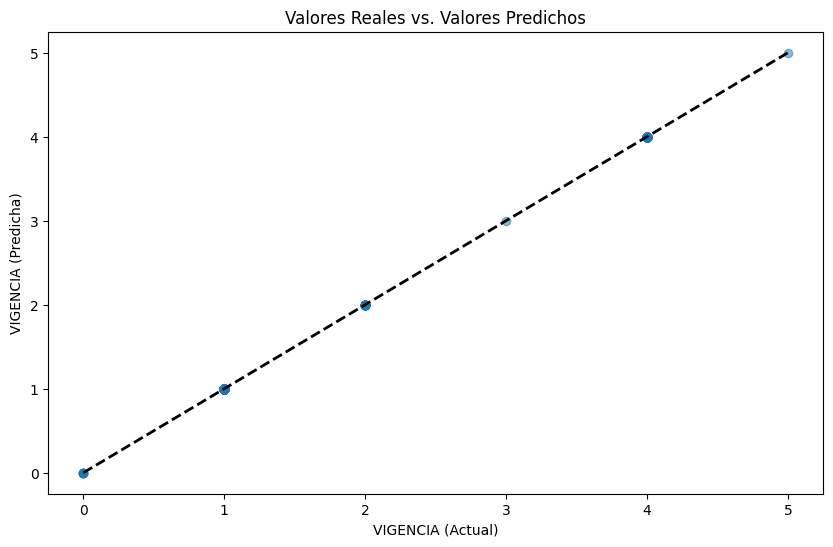

In [112]:
# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('VIGENCIA (Actual)')
plt.ylabel('VIGENCIA (Predicha)')
plt.title('Valores Reales vs. Valores Predichos')
plt.show()